# Notebook to explore data reliability using the original questionnaire

The aims are:
 - Uniquely identify rows so that multiple people can work on known data
 - Identify unique plots
 - look for inconsistencies that make the data unreliable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 300

In [3]:
%matplotlib inline

## Load the data

In [4]:
data_orig = pd.read_excel('../data/wsup/raw/KANYAMA TOILET CENSUS QUESTIONNAIRE.XLSX', 
                          sheetname = 'KANYAMA TOILET CENSUS QUESTIONN', skiprows=1)

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


## Try to profile the data

In [76]:
import pandas_profiling
pandas_profiling.ProfileReport(data_orig)

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


TypeError: '<' not supported between instances of 'int' and 'datetime.datetime'

We have a problem with some of the fields so we need to fix this first - it looks like Record plot number and 1.3 have dates in

## Quick missing value analysis

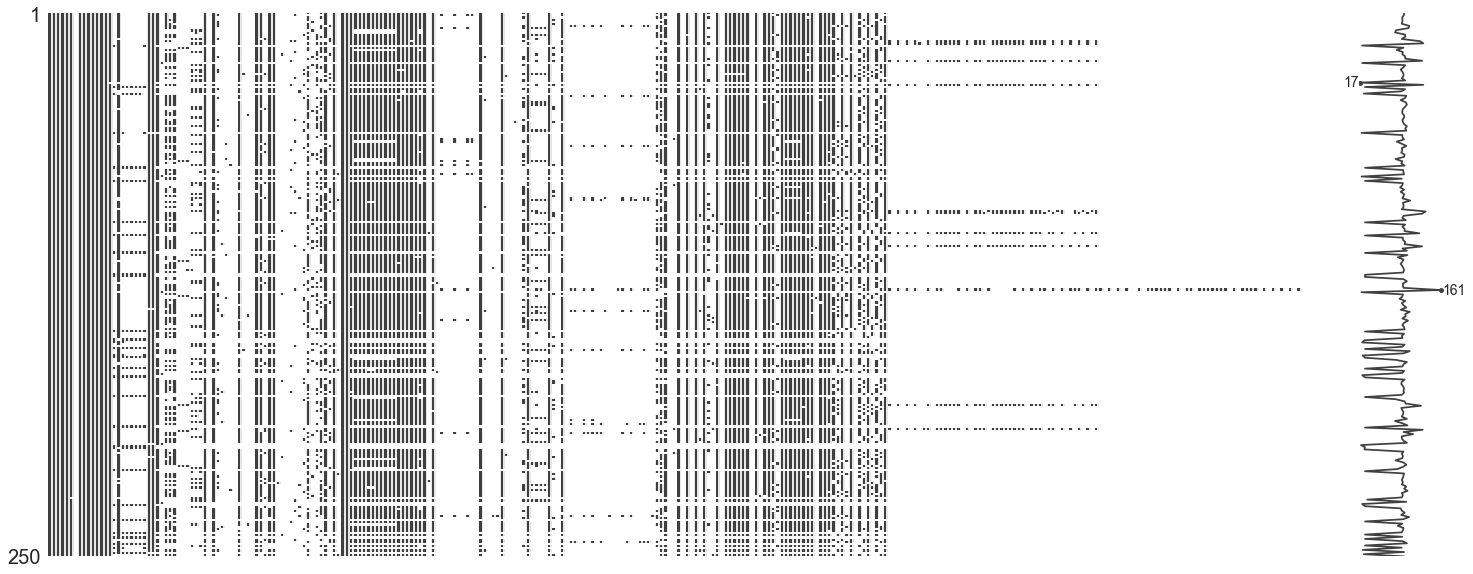

In [5]:
msno.matrix(data_orig.sample(250))

## Drop unwanted columns

In [6]:
drops = [line.strip() for line in open('../data/drops.txt')]
drops
data_orig.drop(drops, 1, inplace=True)

In [7]:
data_orig.head(10)

IS THERE AN ELIGIBLE CANDIDATE TO INTERVIEW?  Record plot number  \
0                                            No           Unknown    
1                                          Yes               47/33   
2                                          Yes               47\31   
3                                          Yes               47/32   
4                                          Yes              46/109   
5                                          Yes               48/36   
6                                          Yes                4856   
7                                          Yes              47/122   
8                                          Yes              47/104   
9                                          Yes              46/160   

   NUMBER OF TIMES THAT YOU HAVE VISITED THE PLACE DATE OF INTERVIEW  \
0                                              2.0        2017-10-16   
1                                              NaN        2017-03-20   
2                                              NaN        2017-03-20   
3                                              NaN        2017-03-20   
4                                              NaN        2017-03-20   
5                                              NaN        2017-03-20   
6                                              NaN        2017-03-20   
7                                              NaN               NaT   
8                                              NaN        2017-03-20   
9                                              NaN        2017-03-20   

  DATE OF INTERVIEW (Time Answered) Are you willing to participate?  \
0               2009-01-01 06:36:48                             NaN   
1               2017-03-20 08:45:07                             Yes   
2               2017-03-20 09:01:55                             Yes   
3               2017-03-20 08:52:26                             Yes   
4               2017-03-20 09:03:51                             Yes   
5               2017-03-20 08:55:52                             Yes   
6               2017-03-20 09:03:47                             Yes   
7                               NaT                             Yes   
8               2017-03-20 09:17:44                             Yes   
9               2017-03-20 09:11:37                             Yes   

   DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (magnitude)  \
0                                                                                                          NaN   
1                                                                                                          1.0   
2                                                                                                          NaN   
3                                                                                                          NaN   
4                                                                                                          5.0   
5                                                                                                          NaN   
6                                                                                                          NaN   
7                                                                                                          1.0   
8                                                                                                         11.0   
9                                                                                                         47.0   

  DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (units)  \
0                                                                                                     NaN   
1                                                                                                     NaN   
2                                                                         

## Uniquely identify each row
 - we know there is no unique field already
 - this ensures that others working with the data work on the same rows
 - on loading the data pandas assigns a unique row id

In [9]:
data_orig['Row_index'] = data_orig.index.map(lambda x: 'Row_%04d' % x)

In [10]:
data_orig.set_index(['Row_index'], inplace=True)

In [11]:
data_orig.shape

(16065, 269)

## Drop unwanted rows

In [12]:
data = data_orig[(data_orig['IS THERE AN ELIGIBLE CANDIDATE TO INTERVIEW?\xa0'].str.contains('Yes')) & 
                (data_orig['Are you willing to participate?'].str.contains('Yes'))]
data.shape

(13552, 269)

In [13]:
data.drop(['IS THERE AN ELIGIBLE CANDIDATE TO INTERVIEW?\xa0', 'Are you willing to participate?'], 1, inplace=True)

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Try again

In [81]:
import pandas_profiling
pandas_profiling.ProfileReport(data[data.columns.difference(['1.3', 'Record plot number'])])

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
data.dtypes

Record plot number                                                                                                                               object
NUMBER OF TIMES THAT YOU HAVE VISITED THE PLACE                                                                                                 float64
DATE OF INTERVIEW                                                                                                                        datetime64[ns]
DATE OF INTERVIEW (Time Answered)                                                                                                        datetime64[ns]
DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (magnitude)                                     float64
DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (units)                                          object
DESCRIPTION OF RESPONDENT: Landlord  - SEX                                              

Give up for now on profiling

# Fix landlord, tenant, caretaker time

In [16]:
import numpy as np

In [17]:
data['sex'] = np.NaN
for c in ['Landlord ', 'Caretaker', 'Tenant']:
    x = 'DESCRIPTION OF RESPONDENT: %s - How long have you stayed/been associated with this plot? (magnitude)' % c
    y = 'DESCRIPTION OF RESPONDENT: %s - How long have you stayed/been associated with this plot? (units)' % c
    z = 'DESCRIPTION OF RESPONDENT: %s - SEX ' % c
    print(data[y].value_counts(dropna=False))
    # Units is often null - is it years or months? (assuming years)
    data['%s_time' % c.strip()] = data[[x,y]].apply(
        lambda row:row[x] if (y == 'Years') or (pd.isnull(y)) else row[x]/12, axis=1)
    data['sex'] = data[['sex',z]].apply(
        lambda row:row[z] if pd.notnull(row[z]) and pd.isnull(row['sex']) else row['sex'], axis=1)

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Years     7108
NaN       6352
Months      92
Name: DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (units), dtype: int64


/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


NaN       13156
Years       367
Months       29
Name: DESCRIPTION OF RESPONDENT: Caretaker - How long have you stayed/been associated with this plot? (units), dtype: int64
NaN       9962
Years     3270
Months     320
Name: DESCRIPTION OF RESPONDENT: Tenant - How long have you stayed/been associated with this plot? (units), dtype: int64


In [18]:
desc = [d for d in data.columns if d.startswith('DESCRIPTION OF')]
desc

['DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (magnitude)',
 'DESCRIPTION OF RESPONDENT: Landlord  - How long have you stayed/been associated with this plot? (units)',
 'DESCRIPTION OF RESPONDENT: Landlord  - SEX ',
 'DESCRIPTION OF RESPONDENT: Caretaker - How long have you stayed/been associated with this plot? (magnitude)',
 'DESCRIPTION OF RESPONDENT: Caretaker - How long have you stayed/been associated with this plot? (units)',
 'DESCRIPTION OF RESPONDENT: Caretaker - SEX ',
 'DESCRIPTION OF RESPONDENT: Tenant - How long have you stayed/been associated with this plot? (magnitude)',
 'DESCRIPTION OF RESPONDENT: Tenant - How long have you stayed/been associated with this plot? (units)',
 'DESCRIPTION OF RESPONDENT: Tenant - SEX ']

In [19]:
data.drop(desc, 1, inplace=True)

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Check responder-specific info now removed

In [65]:
data.head()

Record plot number  NUMBER OF TIMES THAT YOU HAVE VISITED THE PLACE  \
1              47/33                                              NaN   
2              47\31                                              NaN   
3              47/32                                              NaN   
4             46/109                                              NaN   
5              48/36                                              NaN   

  DATE OF INTERVIEW DATE OF INTERVIEW (Time Answered)  \
1        2017-03-20               2017-03-20 08:45:07   
2        2017-03-20               2017-03-20 09:01:55   
3        2017-03-20               2017-03-20 08:52:26   
4        2017-03-20               2017-03-20 09:03:51   
5        2017-03-20               2017-03-20 08:55:52   

  Reasons for refusing to participate? RECORD TYPE OF PROPERTY  \
1                                  NaN        Residential Plot   
2                                  NaN        Residential Plot   
3                                  NaN        Residential Plot   
4                                  NaN        Residential Plot   
5                                  NaN        Residential Plot   

  RECORD TYPE OF PROPERTY (Other (please specify)) - specify SELECT ZONE  \
1                                                        NaN      ZONE 5   
2                                                        NaN      ZONE 5   
3                                                        NaN      ZONE 5   
4                                                        NaN     ZONE 10   
5                                                        NaN     ZONE 11   

  SELECT ZONE (Other (please specify)) - specify  \
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   

  SELECT ZONE (Other (please specify)) - specify3  \
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                                             NaN   

   SELECT ZONE (Other (please specify)) - specify4  \
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
5                                              NaN   

   SELECT ZONE (Other (please specify)) - specify5  \
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
5                                              NaN   

  SELECT ZONE (Other (please specify)) - specify6     SELECT ZONE SECTION  \
1                                             NaN                       A   
2                                             NaN                       A   
3                                             NaN                       A   
4                                             NaN                     NaN   
5                                             NaN  Other (please specify)   

  SELECT ZONE SECTION (Other (please specify)) - specify  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   

  SELECT ZONE SECTION (Other (please specify)) - specify7  \
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4               

### Record plot number is mentioned twice - are the same values given?

In [20]:
data['Record plot number'].dtype

dtype('O')

In [26]:
data['Record plot number'].value_counts()

0                      234
Unknown                154
Don't know             136
999                     78
11555                   66
Unknown                 64
11550                   20
Not known               16
unknown                 14
12199                   13
11503                   11
1                       11
1973-10-01 00:00:00      9
An non                   8
11488                    6
No number                6
Not known                5
5680/m                   5
511                      5
un known                 4
1073                     4
83/16                    4
1234                     4
,                        4
40/90                    4
20/70                    4
50/11                    4
1428                     3
14/70                    3
91/33                    3
21/                      3
2021-12-01 00:00:00      3
don't know               3
130/60                   3
Don't know               3
36/65                    3
25/                      3
1

In [37]:
remove = ["unknown", "0", "not known", "no number", "don't know", "un known"]
dicts = dict(zip(data['Record plot number'].unique(), 
                 ['ID_%04d' % r for r in range(data['Record plot number'].unique().shape[0])]))
data['New_plot_id'] = data['Record plot number'].map(
    lambda x: dicts[x] if (pd.notnull(x) & (str(x).strip().lower() not in remove)) else 'None')

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


It looks like there are a lot of typos

In [22]:
data.loc[data['Record plot number'] != data['1.3'], ['Record plot number', '1.3']].head(100)

Record plot number                  1.3
Row_index                                                        
Row_0005                               48/36                48/56
Row_0009                              46/160                46/60
Row_0010                                 NaN               47/30N
Row_0012                                4841                48/41
Row_0013                                 NaN                  NaN
Row_0014                                 NaN                48/58
Row_0019                                G 53                  G53
Row_0034                              46/132               14/132
Row_0038                              47/23                 47/23
Row_0041                                 47/                  NaN
Row_0046                                 47/                   47
Row_0050                                 NaN               48/632
Row_0055                               48/65               48/659
Row_0060                               48/60                48/66
Row_0074                              ,47/07                47/07
Row_0094                               48/47                48/87
Row_0102                                 NaN                45/98
Row_0104                                 NaN                  NaN
Row_0105                               47/06                 4607
Row_0113                               42/02                46/02
Row_0119                                 NaN                46/40
Row_0122                               46/48               ,46/48
Row_0129                                 NaN                  NaN
Row_0135                               46/10                  NaN
Row_0140                                 NaN                  NaN
Row_0141                               49/34                49/34
Row_0146                               41/31                42/31
Row_0149                               49/50                49/51
Row_0154                                 NaN                  NaN
Row_0155                               49/38               49/102
Row_0157                                   0                  NaN
Row_0158                            Unknown                   NaN
Row_0171                               46/25            nakatindi
Row_0176                               81/48                41/48
Row_0178                               17/14               17/144
Row_0179                                 NaN                  NaN
Row_0181                                   0                  NaN
Row_0190                              16/a17               17/a17
Row_0202                               49/30                49/35
Row_0204                                 NaN                17/24
Row_0205                                 NaN                  NaN
Row_0221                               46/75            nakatindi
Row_0222                               49!15                49/15
Row_0230                                 NaN                42/23
Row_0240   38735 mubwa  road lake petrolium                 38735
Row_0250                                  42               48/041
Row_0259                                 NaN                46/01
Row_0265                               48/08            nakatindi
Row_0270                             Unknown             Unknown 
Row_0275                               16/33               ,16/33
Row_0283                               47/88            nakatindi
Row_0292                                 NaN                47/90
Row_0294                               47\86                47/86
Row_0299                               48/10               48/104
Row_0306                               50/05                  NaN
Row_0309                                1647                16/47
Row_0321                                 NaN                16/58
Row_0322                                 NaN                16/56
Row_0327                               16/48               ,16/48


# What is a meaningful unit?
Note that rows are responders

In [38]:
data['New_plot_id'].unique().shape

(10816,)

In [41]:
data['Responder_type'] = data[['Landlord_time', 'Caretaker_time', 'Tenant_time']].apply(
                            lambda x: 'Landlord' if pd.notnull(x[0]) 
                            else 'Caretaker' if pd.notnull(x[1]) 
                             else 'Tenant' if pd.notnull(x[2]) 
                            else 'Unknown', axis=1)
data['Responder_type'].value_counts(dropna=False)   

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Landlord     8365
Tenant       4004
Unknown       748
Caretaker     435
Name: Responder_type, dtype: int64

### Plot number and responder type?

In [42]:
data.set_index(['New_plot_id', 'Responder_type']).index.unique().shape

(11251,)

This means that responder and caretaker alone is not sufficient

In [44]:
for key, grp in data.groupby(['New_plot_id', 'Responder_type']):
    if grp.shape[0] > 1:
        print(grp.shape, grp[grp.columns.difference(['New_plot_id', 'Responder_type'])].drop_duplicates().shape[0])

(2, 264) 2
(3, 264) 3
(22, 264) 22
(38, 264) 38
(3, 264) 3
(2, 264) 2
(2, 264) 2
(2, 264) 2
(3, 264) 3
(5, 264) 5
(2, 264) 2
(2, 264) 2
(2, 264) 2
(3, 264) 3
(2, 264) 2
(2, 264) 2
(5, 264) 5
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(5, 264) 5
(6, 264) 6
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(3, 264) 3
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(7, 264) 7
(13, 264) 13
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(3, 264) 3
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(3, 264) 3
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 264) 2
(2, 

Loads of plots with no ID and lack of responder info

In [45]:
grp

Record plot number  NUMBER OF TIMES THAT YOU HAVE VISITED THE PLACE  \
Row_index                                                                       
Row_0014                 NaN                                              NaN   
Row_0050                 NaN                                              NaN   
Row_0129                 NaN                                              NaN   
Row_0375                 NaN                                              NaN   
Row_0574                 NaN                                              NaN   
Row_0823                 NaN                                              NaN   
Row_1087                 NaN                                              NaN   
Row_1278                 NaN                                              NaN   
Row_1284                 NaN                                              NaN   
Row_1295                 NaN                                              NaN   
Row_1342                 NaN                                              NaN   
Row_1351                 NaN                                              NaN   
Row_1429                 NaN                                              NaN   
Row_1545                 NaN                                              NaN   
Row_1552                 NaN                                              NaN   
Row_1583                 NaN                                              NaN   
Row_1656                 NaN                                              NaN   
Row_1742                 NaN                                              NaN   
Row_1789                 NaN                                              NaN   
Row_1858                 NaN                                              NaN   
Row_1875                 NaN                                              NaN   
Row_1903                 NaN                                              NaN   
Row_1931                 NaN                                              NaN   
Row_1949                 NaN                                              NaN   
Row_2127                 NaN                                              NaN   
Row_2390                 NaN                                              NaN   
Row_2434                 NaN                                              NaN   
Row_2835                   0                                              NaN   
Row_2875                   0                                              NaN   
Row_2929                 NaN                                              NaN   
Row_2935                 NaN                                              NaN   
Row_2993                 NaN                                              NaN   
Row_3109                   0                                              NaN   
Row_3281                   0                                              NaN   
Row_3283                 NaN                                              NaN   
Row_3292                 NaN                                              NaN   
Row_3391                 NaN                                              NaN   
Row_3394                 NaN                                              NaN   
Row_3547                 NaN                                              NaN   
Row_3614                   0                                              NaN   
Row_3709                 NaN                                              NaN   
Row_3720                 NaN                                              NaN   
Row_3741                 NaN                                              NaN   
Row_3768                   0                                              NaN   
Row_3886                   0                                              NaN   
Row_3911                 NaN                                              NaN   
Row_3965                 NaN                                              NaN   
Row_4046                 NaN             

# EDA

In [47]:
dtypes = data.dtypes
dtypes.value_counts()

float64           140
object            121
datetime64[ns]      3
dtype: int64

In [48]:
cat_cols = dtypes[dtypes == 'object' ].index
cat_cols

Index(['Record plot number', 'RECORD TYPE OF PROPERTY',
       'RECORD TYPE OF PROPERTY (Other (please specify)) - specify',
       'SELECT ZONE', 'SELECT ZONE (Other (please specify)) - specify',
       'SELECT ZONE (Other (please specify)) - specify3',
       'SELECT ZONE (Other (please specify)) - specify6',
       'SELECT ZONE SECTION',
       'SELECT ZONE SECTION (Other (please specify)) - specify',
       'SELECT ZONE SECTION (Other (please specify)) - specify7',
       ...
       'Record the observed shape of the substructure/containment  (Other (please specify)) - specify82',
       'Is Depth of sludge measurable?86',
       'Explain reason for not being able to take the reading of the height 88',
       'TAKE  PHOTO OF INSIDE THE TOILET89',
       'TAKE PHOTO OF OUTSIDE THE TOILET/CONTAINMENT 94', '4.896', '4.998',
       'Any overflow/flooding?100', 'New_plot_id', 'Responder_type'],
      dtype='object', length=121)

In [49]:
cat_vars = ['RECORD TYPE OF PROPERTY', 'SELECT ZONE', 'SELECT ZONE (Other (please specify)) - specify', 
            'SELECT ZONE SECTION', '1.2', '1.3', '1.6.2', 'What is the designation of the respondent?', 
           'Where do you dispose your solid wastes?', 'How did you know about the service of emptying your toilet?', 
           'Was the fee you paid affordable?', 'CONTAINMENT/SUBSTRUCTURE']

## What is the distribution of these variables

RECORD TYPE OF PROPERTY
SELECT ZONE
SELECT ZONE SECTION

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



1.6.2
Where do you dispose your solid wastes?
How did you know about the service of emptying your toilet?
Was the fee you paid affordable?
CONTAINMENT/SUBSTRUCTURE


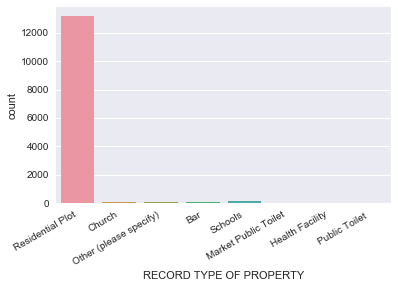

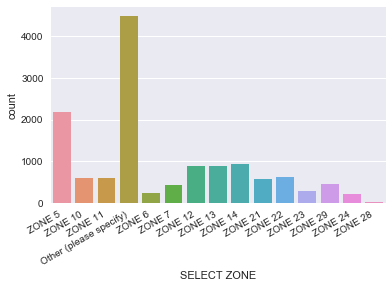

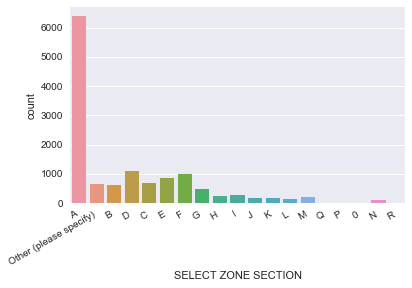

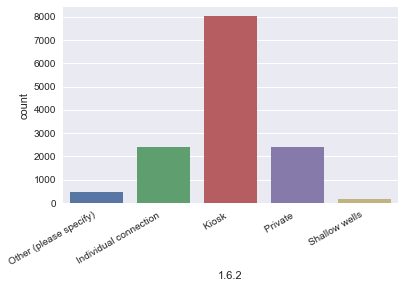

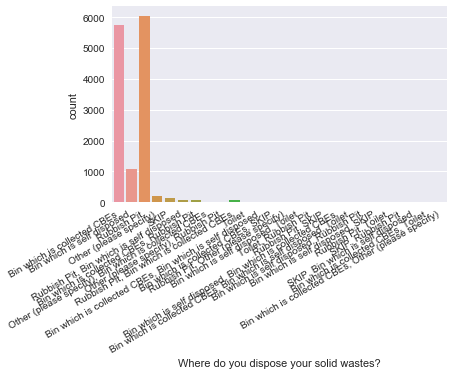

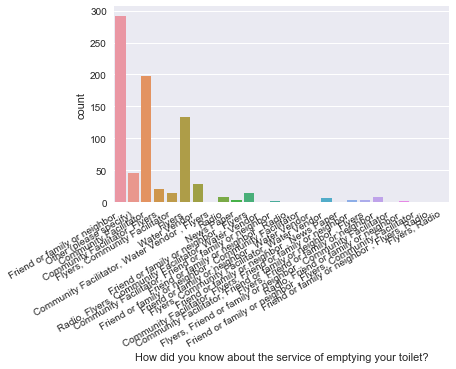

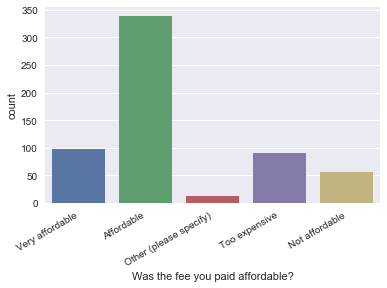

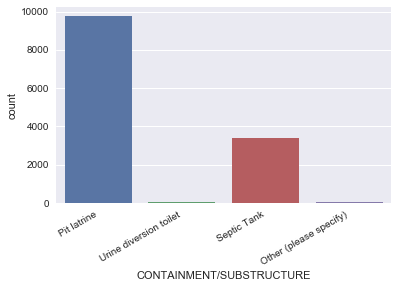

In [51]:
for c in cat_vars:
    
    if data[c].unique().shape[0] < 30:
        print(c)
        fig, ax = plt.subplots()
        sns.countplot(data.loc[data[c].notnull(), c], ax=ax)
        fig.autofmt_xdate()

## Dates of visits

In [52]:
date_cols = dtypes[dtypes == 'datetime64[ns]' ].index

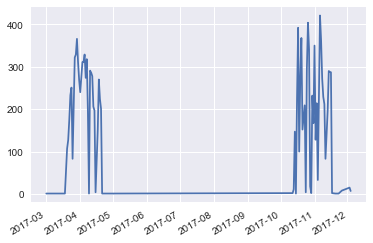

In [53]:
fig, ax = plt.subplots()
data['DATE OF INTERVIEW'].value_counts().plot(ax=ax)

## Times of visits

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


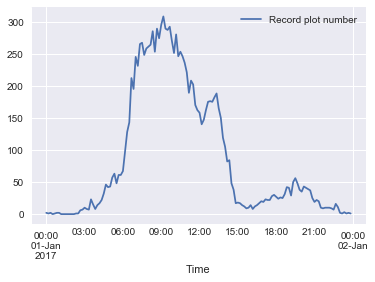

In [54]:
data['Time'] = data['DATE OF INTERVIEW (Time Answered)'].map(
    lambda x:x.replace(day=1, month=1) if pd.notnull(x) else pd.NaT)
temp = data[['Time', 'Record plot number']].set_index('Time').dropna()
temp.resample('10T').count().plot()

In [55]:
data.head().T

Row_index                                                                                                                                                                                        Row_0001  \
Record plot number                                                                                                                                                                                  47/33   
NUMBER OF TIMES THAT YOU HAVE VISITED THE PLACE                                                                                                                                                       NaN   
DATE OF INTERVIEW                                                                                                                                                                     2017-03-20 00:00:00   
DATE OF INTERVIEW (Time Answered)                                                                                                                                                     2017-03-20 08:45:07   
RECORD TYPE OF PROPERTY                                                                                                                                                                  Residential Plot   
RECORD TYPE OF PROPERTY (Other (please specify)) - specify                                                                                                                                            NaN   
SELECT ZONE                                                                                                                                                                                        ZONE 5   
SELECT ZONE (Other (please specify)) - specify                                                                                                                                                        NaN   
SELECT ZONE (Other (please specify)) - specify3                                                                                                                                                       NaN   
SELECT ZONE (Other (please specify)) - specify4                                                                                                                                                       NaN   
SELECT ZONE (Other (please specify)) - specify5                                                                                                                                                       NaN   
SELECT ZONE (Other (please specify)) - specify6                                                                                                                                                       NaN   
SELECT ZONE SECTION                                                                                                                                                                                     A   
SELECT ZONE SECTION (Other (please specify)) - specify                                                                                                                                                NaN   
SELECT ZONE SECTION (Other (please specify)) - specify7                                                                                                                                               NaN   
SELECT ZONE SECTION (Other (please specify)) - specify8                                                                                                                                               NaN   
1.2                                                                                                                                                                                               Sunrise   
1.3                                                                                                                                                                                                 47/33   
1.3 (Don't Know)                                                                                         

## Explore landlord, tenant, caretaker time

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


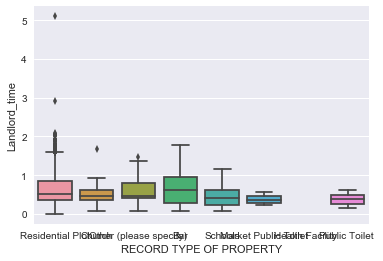

In [56]:
import numpy as np
sns.boxplot(x=data['RECORD TYPE OF PROPERTY'], y=data['Landlord_time'].map(lambda x:np.log(x+1)))

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


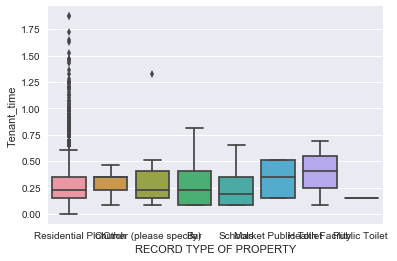

In [57]:
sns.boxplot(x=data['RECORD TYPE OF PROPERTY'], y=data['Tenant_time'].map(lambda x:np.log(x+1)))

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


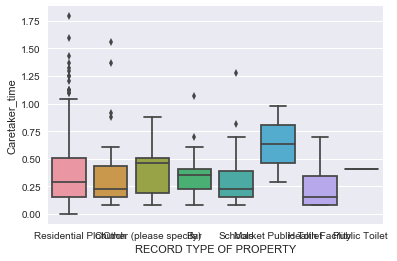

In [58]:
sns.boxplot(x=data['RECORD TYPE OF PROPERTY'], y=data['Caretaker_time'].map(lambda x:np.log(x+1)))

In [59]:
data[['Landlord_time', 'Caretaker_time', 'Tenant_time']].describe()

Landlord_time  Caretaker_time  Tenant_time
count    8365.000000      439.000000  4031.000000
mean        1.015043        0.531891     0.364891
std         2.010184        0.606489     0.371191
min         0.000000        0.000000     0.000000
25%         0.416667        0.166667     0.166667
50%         0.666667        0.333333     0.250000
75%         1.333333        0.666667     0.416667
max       163.833333        5.000000     5.500000

Landlords have typically been there the longest... but note that some landlords have been there 164 years

# Record type of property vs zone

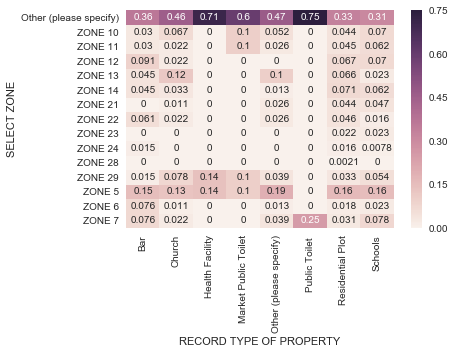

In [60]:
ct = pd.crosstab(data['SELECT ZONE'], data['RECORD TYPE OF PROPERTY'])
ct = ct.div(ct.sum(axis=0), axis=1)
sns.heatmap(ct, annot=True)

In [61]:
data[data['RECORD TYPE OF PROPERTY']== 'Public Toilet ']

Record plot number  NUMBER OF TIMES THAT YOU HAVE VISITED THE PLACE  \
Row_index                                                                       
Row_1823                 NaN                                              NaN   
Row_4154               96/50                                              NaN   
Row_4953                 P71                                              NaN   
Row_9694                 NaN                                              NaN   

          DATE OF INTERVIEW DATE OF INTERVIEW (Time Answered)  \
Row_index                                                       
Row_1823         2017-04-05               2017-03-29 07:30:52   
Row_4154         2017-04-05               2017-04-05 11:56:52   
Row_4953         2017-04-08               2017-04-08 06:09:33   
Row_9694         2017-10-23               2017-10-23 09:16:43   

          RECORD TYPE OF PROPERTY  \
Row_index                           
Row_1823           Public Toilet    
Row_4154           Public Toilet    
Row_4953           Public Toilet    
Row_9694           Public Toilet    

          RECORD TYPE OF PROPERTY (Other (please specify)) - specify  \
Row_index                                                              
Row_1823                                                         NaN   
Row_4154                                                         NaN   
Row_4953                                                         NaN   
Row_9694                                                         NaN   

                      SELECT ZONE  \
Row_index                           
Row_1823   Other (please specify)   
Row_4154   Other (please specify)   
Row_4953   Other (please specify)   
Row_9694                   ZONE 7   

          SELECT ZONE (Other (please specify)) - specify  \
Row_index                                                  
Row_1823                                             NaN   
Row_4154                                               9   
Row_4953                                          Zone 9   
Row_9694                                             NaN   

          SELECT ZONE (Other (please specify)) - specify3  \
Row_index                                                   
Row_1823                                           Zone 4   
Row_4154                                              NaN   
Row_4953                                              NaN   
Row_9694                                              NaN   

           SELECT ZONE (Other (please specify)) - specify4  \
Row_index                                                    
Row_1823                                               NaN   
Row_4154                                               NaN   
Row_4953                                               NaN   
Row_9694                                               NaN   

           SELECT ZONE (Other (please specify)) - specify5  \
Row_index                                                    
Row_1823                                               NaN   
Row_4154                                               NaN   
Row_4953                                               NaN   
Row_9694                                               NaN   

          SELECT ZONE (Other (please specify)) - specify6 SELECT ZONE SECTION  \
Row_index                                                                       
Row_1823                                              NaN                   C   
Row_4154                                              NaN                   B   
Row_4953                                              NaN                   A   
Row_9694                                              NaN                   D   

          SELECT ZONE SECTION (Other (please specify)) - specify  \
Row_index                                                          
Row_1823                                                     NaN   
Row_4154                                                     NaN   
Row_4953            

## Total number of toilets - lots of NaNs

In [62]:
data['Total number of toilets{0}'].value_counts(dropna=False)

NaN      6894
 1.0     5684
 2.0      791
 3.0      106
 4.0       28
 0.0       22
 5.0        8
 6.0        7
 11.0       3
 15.0       3
 7.0        2
 12.0       2
 8.0        1
 10.0       1
Name: Total number of toilets{0}, dtype: int64

In [76]:
temp = data[['Total_toilets_sum', 'Total number of toilets{0}']].max(axis=1)
temp.isnull().sum()


105

In [77]:
toil_cols = ['1.6 - 1 - 1.5.1','1.6 - 2 - 1.5.1','1.6 - 3 - 1.5.1','1.6 - 4 - 1.5.1',
     '1.6 - 5 - 1.5.1','1.6 - 6 - 1.5.1','1.6 - 7 - 1.5.1','1.6 - 8 - 1.5.1']
data['Total_toilets_sum'] = data[toil_cols].sum(axis=1, min_count=1)
data['Total_toilets_sum'] =  data[['Total_toilets_sum', 'Total number of toilets{0}']].max(axis=1)

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
data['Total_toilets_sum'].value_counts(dropna=False)

 1.0     12344
 2.0       854
NaN        148
 3.0       126
 4.0        26
 11.0       11
 5.0        10
 7.0         8
 6.0         6
 0.0         4
 8.0         4
 10.0        4
 12.0        4
 36.0        1
 17.0        1
 32.0        1
Name: Total_toilets_sum, dtype: int64

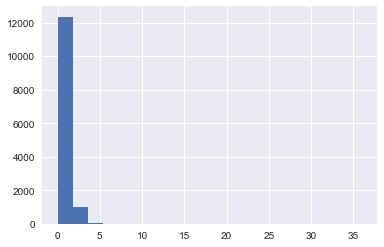

In [67]:
data['Total_toilets_sum'].hist(bins=20)

## Do any residential plots not have any toilets?

In [69]:
data[(data['RECORD TYPE OF PROPERTY']=='Residential Plot') & data['Total_toilets_sum'].isnull()].shape

(139, 266)

## Strange patterns in categorical variables

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


SELECT ZONE (Other (please specify)) - specify 71
1.2 1157
1.3 10945
What is the designation of the respondent? 750


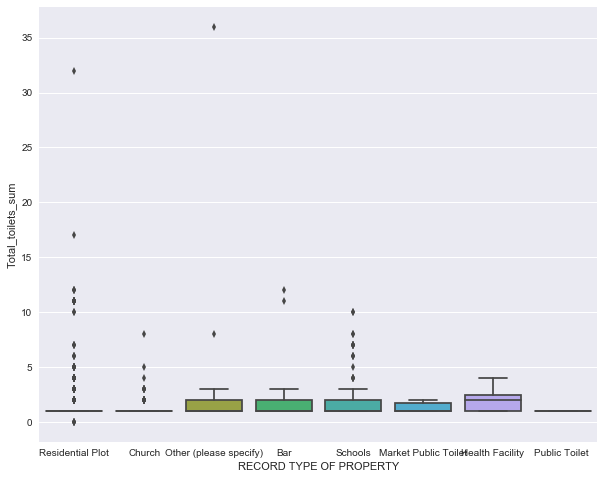

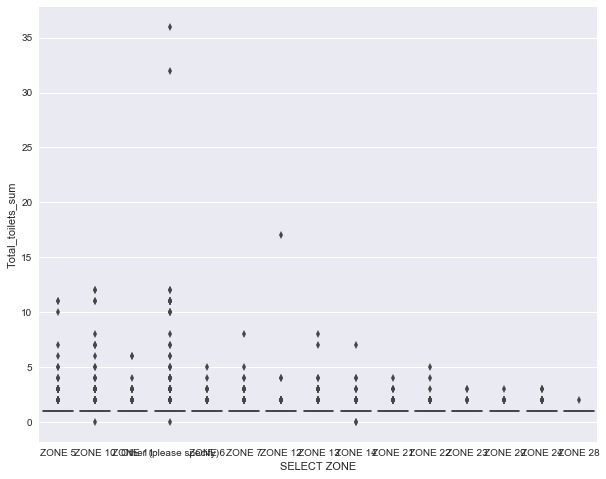

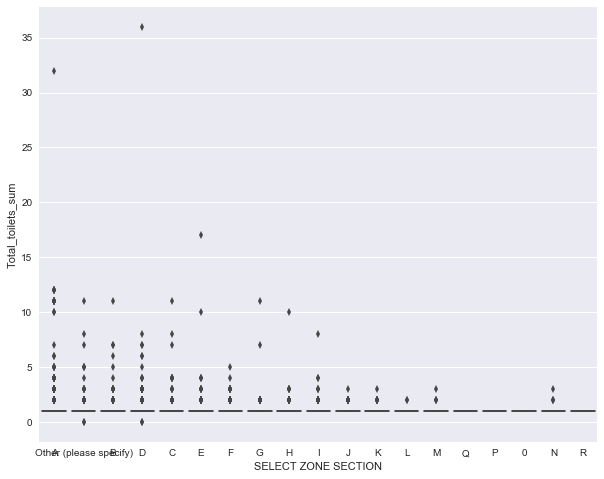

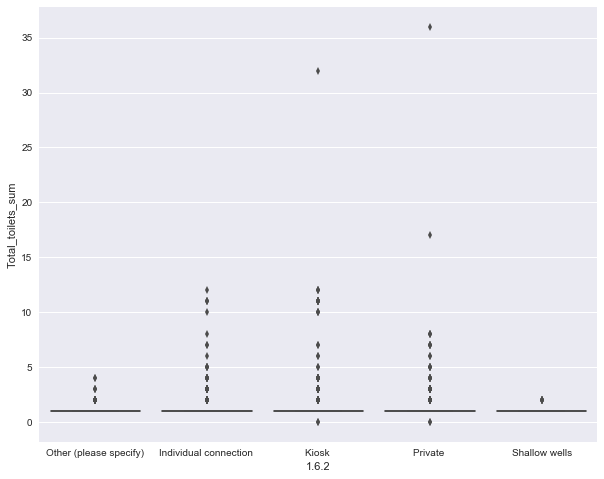

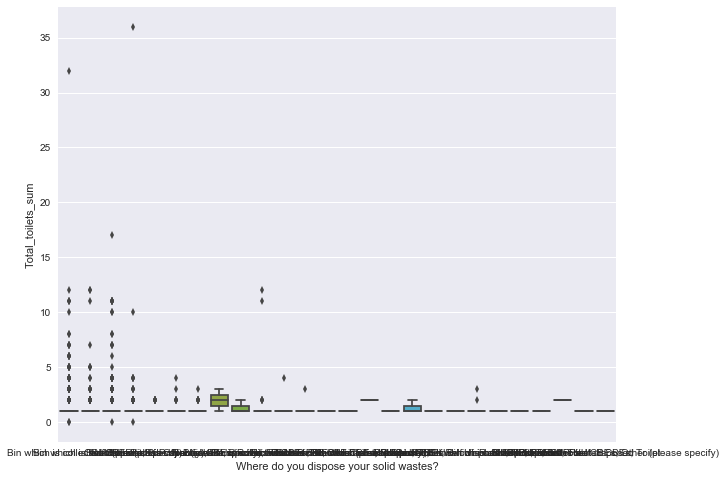

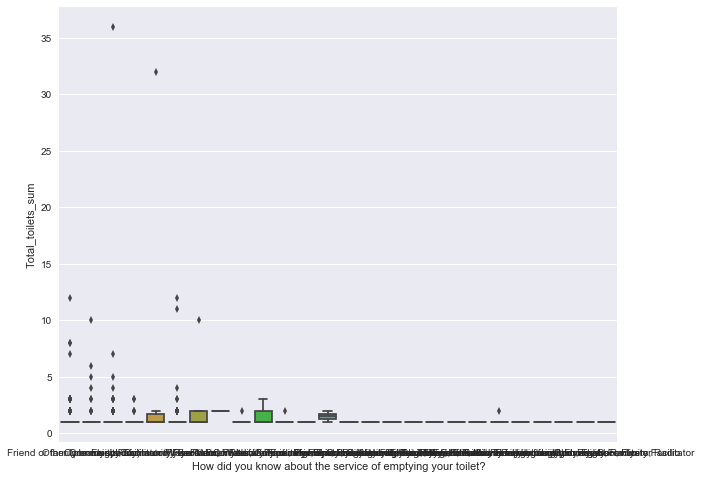

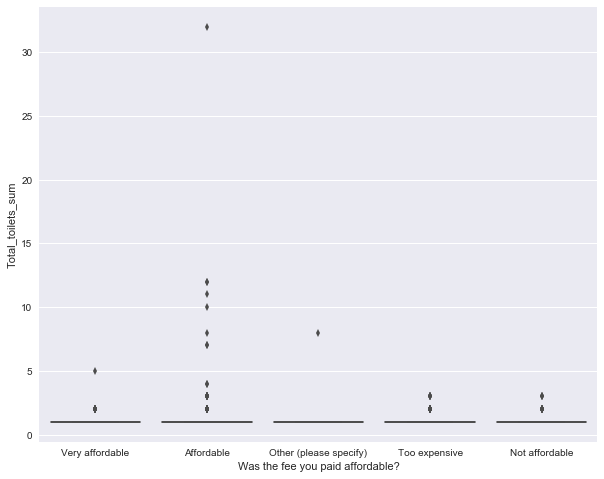

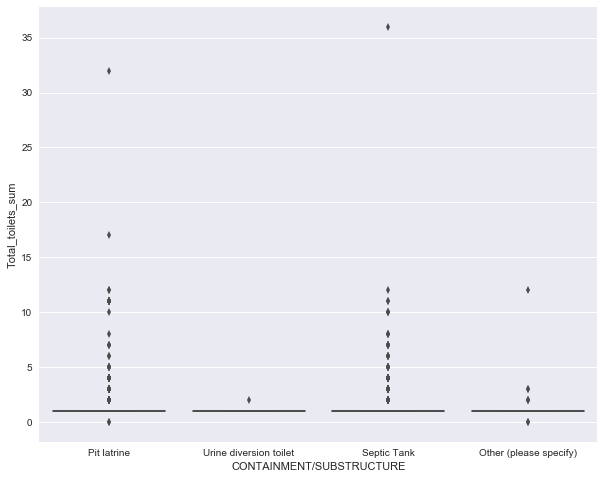

In [70]:
for c in cat_vars:
    if data[c].unique().shape[0] > 30: print(c,data[c].unique().shape[0]); continue
    fig, ax = plt.subplots(figsize=(10,8))
    sns.boxplot(x=data[c], y = data['Total_toilets_sum'], ax=ax)

In [ ]:
## Household size by zone

In [117]:
data.loc[data['1.4'].notnull(), '1.4'].astype(int).value_counts()

1             3946
2             2373
3             2164
4             1728
5             1119
6              644
7              457
8              229
9              142
10              95
11              57
12              38
13              23
14              18
15               9
17               8
18               4
16               3
22               3
24               2
0                2
19               2
30               2
26               1
42               1
27               1
81               1
73               1
25               1
115              1
28               1
412              1
416              1
56               1
53               1
9745502503       1
31               1
Name: 1.4, dtype: int64

# Residential only

In [125]:
data_residential = data[data['RECORD TYPE OF PROPERTY'] == 'Residential Plot']

In [126]:
data_residential.shape

(13147, 271)

In [ ]:
## How often are there more than three toilets mentioned but not described?

In [78]:
data.to_hdf('../data/wsup/tidy/data_tidied.h5', key='main')

/usr/local/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['Record plot number', 'RECORD TYPE OF PROPERTY', 'RECORD TYPE OF PROPERTY (Other (please specify)) - specify', 'SELECT ZONE', 'SELECT ZONE (Other (please specify)) - specify', 'SELECT ZONE (Other (please specify)) - specify3', 'SELECT ZONE (Other (please specify)) - specify6', 'SELECT ZONE SECTION', 'SELECT ZONE SECTION (Other (please specify)) - specify', 'SELECT ZONE SECTION (Other (please specify)) - specify7', 'SELECT ZONE SECTION (Other (please specify)) - specify8', '1.2', '1.3', '1.6.1 Do you think there is space on this plot to construct another toilet?: Yes - If Yes how many more? If No, why is that the case?', '1.6.1 Do you think there is space on this plot to construct another toilet?: No - If Yes how many mo